In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221108_insitu'
subfolder = glob.glob(cwd + '/**100uL**')
subfolder.sort()
del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221108_insitu/CsPbBr_100uL
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221108_insitu/CsPbBr_100uL_I_008uL
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221108_insitu/CsPbBr_100uL_I_016uL
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221108_insitu/CsPbBr_100uL_I_032uL
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221108_insitu/CsPbBr_100uL_I_064uL


In [5]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['Insitu CsPb 6mM + Br 6 mM',
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 8uL/min', 
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 16uL/min',
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 32uL/min', 
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 64uL/min']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = ['CsPbBr',
         'ZnI2 8 uL/min', 
         'ZnI2 16 uL/min',
         'ZnI2 32 uL/min',
         'ZnI2 64 uL/min']
         # 'ZnI2 128 uL/min']

CsPbBr_100uL
CsPbBr_100uL_I_008uL
CsPbBr_100uL_I_016uL
CsPbBr_100uL_I_032uL
CsPbBr_100uL_I_064uL


In [6]:
## Reading dark and reference
dark = cwd + '/' + 'Dark_Abs_20221108-154436_dfc6c06b.csv'
ref = cwd + '/' + 'TOl_OA_Abs_20221108-154443_1f59eee7.csv'

dark_df = pd.read_csv(dark, skiprows=2, sep=',')
ref_df = pd.read_csv(ref, skiprows=2, sep=',')

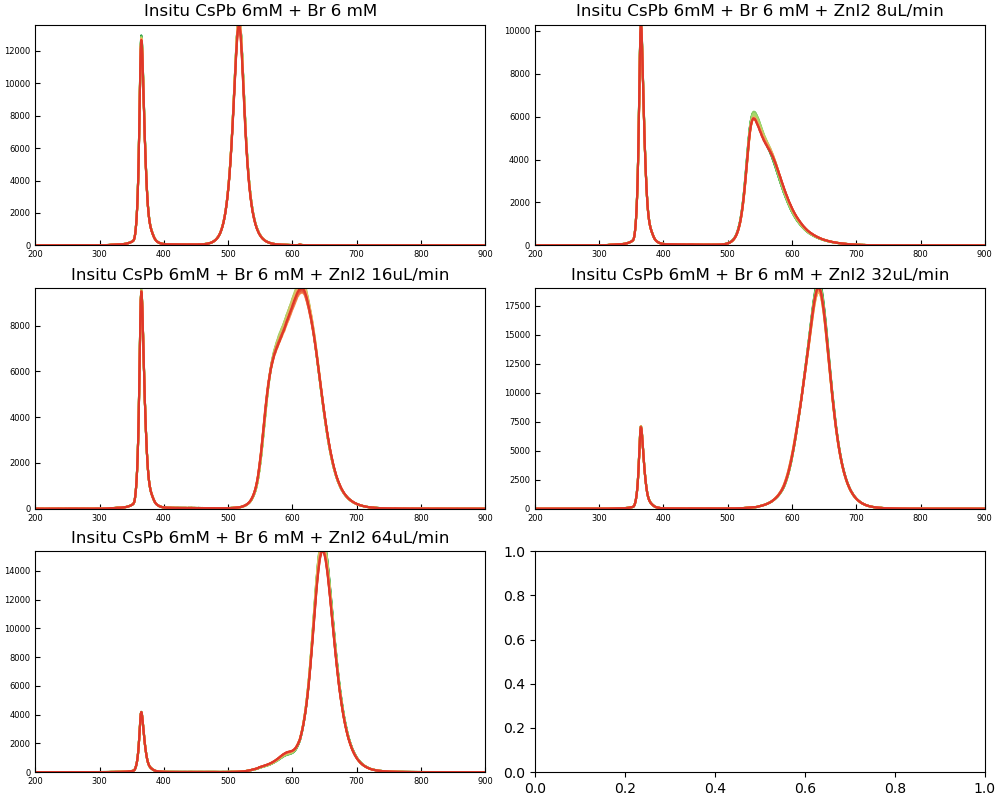

In [7]:
## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(3, 2, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 300
w2 = 800

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + '/**PL**.csv')
    data_files.sort()
    del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    if i==0: skiprows=4
    else: skiprows=7
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        PL = df_j['Raw Sample']-dark_df.Sample
        ax1[i].plot(df_j.Energy, PL, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(-0.1, max(PL[100:800])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
        #df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, PL], axis=1, ignore_index=True)
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
    #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
    df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['Energy'] = df_j.Energy
df_norm['Energy'] = df_j.Energy.loc[w1:w2]
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

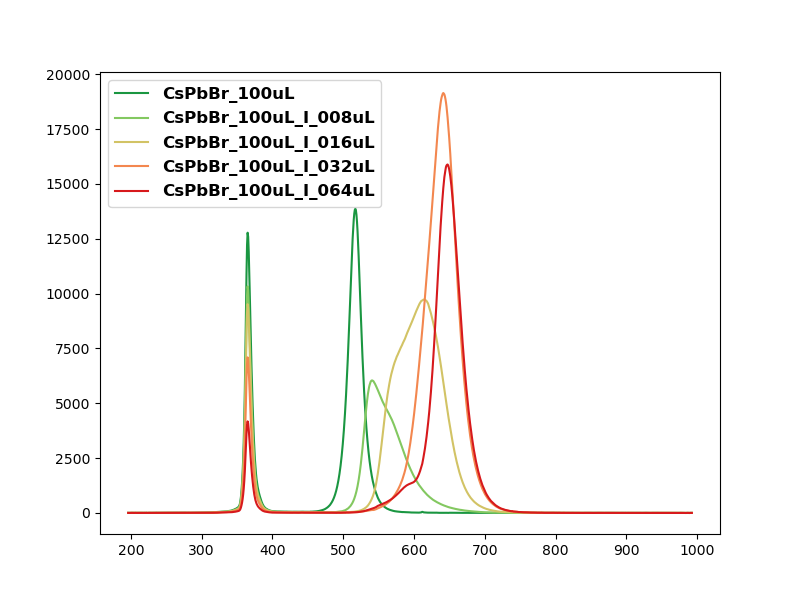

In [8]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.Energy, getattr(df, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=os.path.basename(subfolder[i]))

legend_properties = {'weight':'bold', 'size':12}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

In [9]:
## Fit PL peaks by 1 Gaussian distribution
## http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html
## https://en.wikipedia.org/wiki/Cauchy_distribution


def _1gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))


def _1Lorentz(x, A, x0, sigma):
    return A*sigma**2/((x-x0)**2+sigma**2)


def _1peak_fit_PL(x, y, distr='G', plot=False, plot_title=None, maxfev=100000):    
    # 'G': Guassian
    # 'L': Lorentz        
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    if distr == 'G':
        popt, pcov = curve_fit(_1gauss, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    else:
        popt, pcov = curve_fit(_1Lorentz, x, y, p0=[max(y), mean, sigma], maxfev=maxfev)
    
    A = popt[0]
    x0 = popt[1]
    sigma = popt[2]
    
    if distr == 'G':
        fitted_result = _1gauss(x, *popt)
        fit_model = 'Gaussian'
    else:
        fitted_result = _1Lorentz(x, *popt)
        fit_model = 'Lorentz'
    
    #fitted_result = _1gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        plt.legend()
        plt.title(f'{fit_model} : {plot_title}')
        plt.show()
    else: pass
    
    return popt, r_2


In [10]:
## Fit PL peaks by Multi Gaussian distributions
## http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html

def _2gauss(x, A1, x1, s1, A2, x2, s2):
    return (_1gauss(x, A1, x1, s1) +
            _1gauss(x, A2, x2, s2))


def _3gauss(x, A1, x1, s1, A2, x2, s2, A3, x3, s3):
    return (_1gauss(x, A1, x1, s1) +
            _1gauss(x, A2, x2, s2) + 
            _1gauss(x, A3, x3, s3))


def _2Lorentz(x, A1, x1, s1, A2, x2, s2):
    return (_1Lorentz(x, A1, x1, s1) +
            _1Lorentz(x, A2, x2, s2))


def _3Lorentz(x, A1, x1, s1, A2, x2, s2, A3, x3, s3):
    return (_1Lorentz(x, A1, x1, s1) +
            _1Lorentz(x, A2, x2, s2) +
            _1Lorentz(x, A3, x3, s3))


def _2peak_fit_PL(x, y, distr='G', height=930, plot=False, plot_title=None, second_peak=3, maxfev=100000):
    # 'G': Guassian
    # 'L': Lorentz  
    peaks, _ = find_peaks(y, height=height)
    if len(peaks) >2:
        raise IndexError('Number of peaks should be less than 2.')
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    
    if len(peaks) == 2:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[-1]], x[peaks[-1]], sigma], maxfev=maxfev)
    else:
        if distr == 'G':
            popt, pcov = curve_fit(_2gauss, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
        else:
            popt, pcov = curve_fit(_2Lorentz, x, y, p0=[y[peaks[0]], x[peaks[0]], sigma, y[peaks[0]]/abs(second_peak*sigma), x[peaks[0]]-second_peak*sigma, sigma], maxfev=maxfev)
    #A = popt[0]
    #x0 = popt[1]
    #sigma = popt[2]
    
    pars_1 = popt[0:3]
    pars_2 = popt[3:6]
    
    if distr == 'G':
        peak_1 = _1gauss(x, *pars_1)
        peak_2 = _1gauss(x, *pars_2)
        fit_model = 'Gaussian'
    else:
        peak_1 = _1Lorentz(x, *pars_1)
        peak_2 = _1Lorentz(x, *pars_2)
        fit_model = 'Lorentz'
    
    fitted_result = _2gauss(x, *popt)
    residulas = y - fitted_result
    ss_res = np.sum(residulas**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_2 = 1 - (ss_res / ss_tot)
    r2 = f'R\u00b2={r_2:.2f}'
    
    if plot == True:
        plt.figure()
        plt.plot(x,y,'b+:',label='data')
        plt.plot(x,fitted_result,'ro:',label='Total fit\n'+r2)
        
        # peak 1
        plt.plot(x, peak_1, "g", label='peak 1')
        plt.fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)
  
        # peak 2
        plt.plot(x, peak_2, "y", label='peak 2')
        plt.fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)  
        
        plt.title(f'{fit_model} : {plot_title}')
        plt.legend()
        plt.show()
    else: pass
    
    return popt, r_2

Text(0, 0.5, 'PLQY')

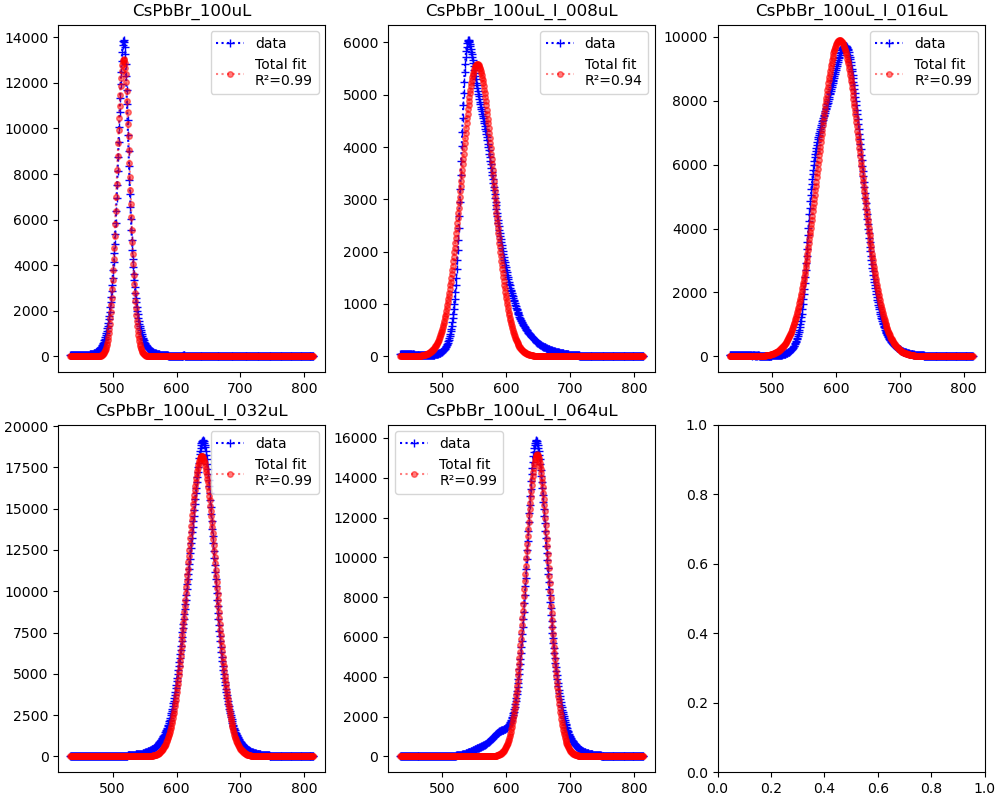

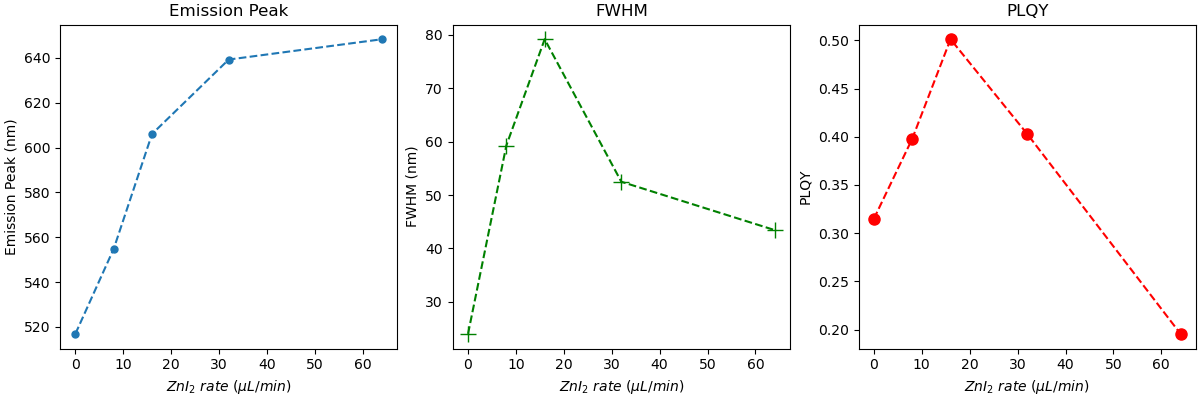

In [11]:
## 1 Gaussian peak fittimg

f3, ax3 = plt.subplots(2, 3, figsize = (10, 8), constrained_layout=True)
ax3 = ax3.flatten()
w1 = 300
w2 = 800

peak = []
fwhm = []
simpson_int = []

for i in range(len(subfolder)):
    #i = 4
    x = np.array(df[w1:w2].Energy)
    y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
    #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))
    popt, r_2 = _1peak_fit_PL(x,y, distr='G')
    
    simpson_int.append(integrate.simpson(y,x))
    peak.append(popt[1])
    fwhm.append(2.355*popt[2])
    
    
    r2 = f'R\u00b2={r_2:.2f}'
    fitted_result = _1gauss(x, *popt)
    ax3[i].set_title(os.path.basename(subfolder[i]))
    ax3[i].plot(x,y,'b+:',label='data')
    ax3[i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=4)
    ax3[i].legend()


# abs_365 = np.asarray([0.458828, 0.373916, 0.656800, 1.052980, 1.582505, 1.302717])
abs_365 = np.asarray([0.458828, 0.373916, 0.656800, 1.052980, 1.582505])
abs_365_r = 0.340616
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 588011.0
integral_pqds = np.asarray(simpson_int)

plqy = plqy_r*abs_365_r*(ref_idx_toluene**2)*integral_pqds / (integral_r*(ref_idx_H2SO4**2)*abs_365)
    
f4, ax4 = plt.subplots(1, 3, figsize = (12, 4), constrained_layout=True)
ax4[0].set_title('Emission Peak')
ax4[0].plot([0,8,16,32,64], peak, '.--', markersize=10)
ax4[0].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
ax4[0].set_ylabel('Emission Peak (nm)')

ax4[1].set_title('FWHM')
ax4[1].plot([0,8,16,32,64], fwhm, 'g+--', markersize=12)
ax4[1].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
ax4[1].set_ylabel('FWHM (nm)')

ax4[2].set_title('PLQY')
ax4[2].plot([0,8,16,32,64], plqy, 'ro--', markersize=8)
ax4[2].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
ax4[2].set_ylabel('PLQY')

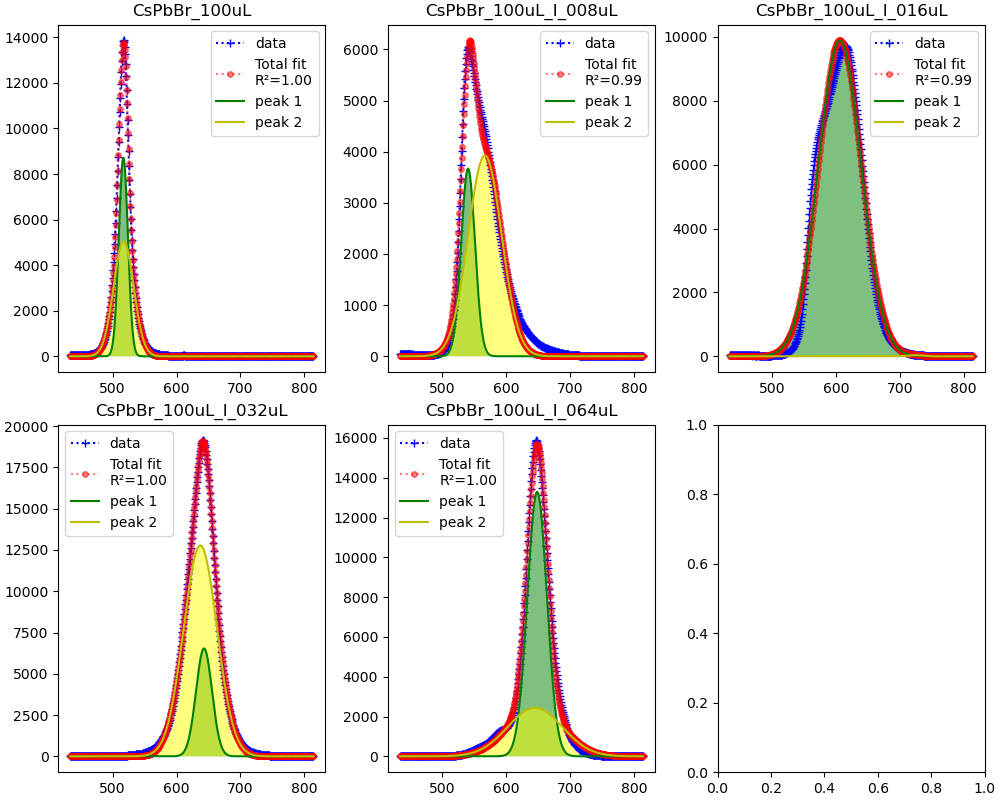

In [12]:
## 2 Gaussian peak fittimg

f5, ax5 = plt.subplots(2, int(len(subfolder)/2)+1, figsize = (10, 8), constrained_layout=True)
ax5 = ax5.flatten()
w1 = 300
w2 = 800

peak1 = []
peak2 = []
fwhm1 = []
fwhm2 = []
simpson_int = []

for i in range(len(subfolder)):
    #i = 4
    x = np.array(df[w1:w2].Energy)
    y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
    popt, r_2 = _2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot_title=os.path.basename(subfolder[i]))
    #popt, r_2 = _1peak_fit_PL(x,y, distr='G')
    
    simpson_int.append(integrate.simpson(y,x))
    peak1.append(popt[1])
    peak2.append(popt[4])
    fwhm1.append(2.355*popt[2])
    fwhm2.append(2.355*popt[5])
    
    
    r2 = f'R\u00b2={r_2:.2f}'
    fitted_result = _2gauss(x, *popt)
    ax5[i].set_title(os.path.basename(subfolder[i]))
    ax5[i].plot(x,y,'b+:',label='data')
    ax5[i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=4)
    
    # peak 1
    peak_1 = _1gauss(x, *popt[0:3])
    ax5[i].plot(x, peak_1, "g", label='peak 1')
    ax5[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

    # peak 2
    peak_2 = _1gauss(x, *popt[3:6])
    ax5[i].plot(x, peak_2, "y", label='peak 2')
    ax5[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)
    
    ax5[i].legend()


# ## Swap the peak1 and peak2 if peak2 > peak1
# for i in range(len(peak1)):
#     if peak1[i] > peak2[i]:
#         a, b = peak1[i], peak2[i]
#         peak1[i], peak2[i] = b, a
#         c, d = fwhm1[i], fwhm2[i]
#         fwhm1[i], fwhm2[i] = d, c

# abs_365 = np.asarray([0.458828, 0.373916, 0.656800, 1.052980, 1.582505])
# abs_365_r = 0.340616
# plqy_r = 0.546
# ref_idx_toluene = 1.506
# ref_idx_H2SO4 = 1.337
# integral_r = 588011.0
# integral_pqds = np.asarray(simpson_int)

# plqy = plqy_r*abs_365_r*(ref_idx_toluene**2)*integral_pqds / (integral_r*(ref_idx_H2SO4**2)*abs_365)
    
# f6, ax6 = plt.subplots(1, 3, figsize = (12, 4), constrained_layout=True)
# #ax6 = ax6.flatten()
# ax6[0].set_title('Emission Peak')
# ax6[0].plot([0,8,16,32,64], peak1, 'b.--', markersize=10, label='Peak 1')
# ax6[0].plot([0,8,16,32,64], peak2, 'g.--', markersize=10, label='Peak 2')
# ax6[0].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
# ax6[0].set_ylabel('Emission Peak (nm)')
# ax6[0].legend()

# ax6[1].set_title('FWHM')
# ax6[1].plot([0,8,16,32,64], np.abs(fwhm1), 'b^--', markersize=8, label='Peak 1')
# ax6[1].plot([0,8,16,32,64], np.abs(fwhm2), 'g^--', markersize=8, label='Peak 2')
# ax6[1].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
# ax6[1].set_ylabel('Emission Peak (nm)')
# ax6[1].legend()

# ax6[2].set_title('PLQY')
# ax6[2].plot([0,8,16,32,64], plqy, 'ro--', markersize=8)
# ax6[2].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
# ax6[2].set_ylabel('PLQY')

# '''
# ax6[3].set_title('Emission Peak 2')
# ax6[3].plot([0,8,16,32,64], peak2, '.--', markersize=10)
# ax6[3].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
# ax6[3].set_ylabel('Emission Peak (nm)')

# ax6[4].set_title('FWHM of Emission peak 2')
# ax6[4].plot([0,8,16,32,64], fwhm2, 'g+--', markersize=12)
# ax6[4].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
# ax6[4].set_ylabel('Emission Peak (nm)')
# '''

In [13]:
popt

array([13291.28554245,   648.4027094 ,    15.32909696,  2438.20446061,
         645.10815514,   -42.75130916])

In [14]:
fwhm2

[-36.92211844256594,
 -61.694524849756945,
 29.32915154752178,
 -61.578843230373955,
 -100.67933306604122]

In [15]:
for i in range(len(peak1)):
    if peak1[i] > peak2[i]:
        a, b = peak1[i], peak2[i]
        peak1[i], peak2[i] = b, a
        c, d = fwhm1[i], fwhm2[i]
        fwhm1[i], fwhm2[i] = d, c

In [16]:
peak2

[517.239688748614,
 566.6272313579613,
 723.5041883716572,
 642.9946097903819,
 648.402709399617]

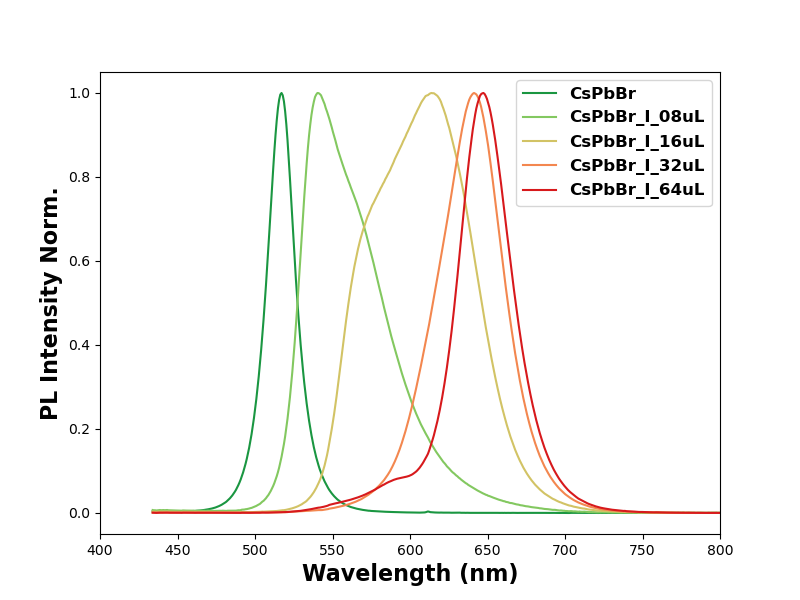

In [17]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f4, ax4 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = ['CsPbBr', 'CsPbBr_I_08uL', 'CsPbBr_I_16uL', 'CsPbBr_I_32uL', 'CsPbBr_I_64uL']
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax4.plot(df_norm2.Energy, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
ax4.legend(prop=legend_properties)

ax4.set_xlim(400, 800)
ax4.set_xlabel('Wavelength (nm)', fontsize=labelsize-4, fontweight=fontweight)
ax4.set_ylabel('PL Intensity Norm.', fontsize=labelsize-4, fontweight=fontweight)

imag_name = '20220630_PL_CsPbBr_I.png'
#plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=False)